# Linear regression for prediction

For the remainder of the module we will look at using linear regression in a more algorithmic/computer science/machine learning context. In this notebook we will take a more detailed look at conducting linear regression in `scikit-learn`, you will:
* write your own code to compute MSE
* Learn what training and testing sets are
* Use `scikit-learn` to perform a multiple linear regression
* Evaluate your results
* Create a model to predict housing prices


## Assesing model accuracy

We always must evaluate how 'good' our model is in order to understand how it performs. One common meaure of accuracy (or error) for a regression type problem is **Mean Squared Error (MSE)**. This can be calculated using the following formula:

<div style="font-size: 120%;">  
$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i − \hat{f}(x_i))^2, $$
</div>

where $y_i$ is the true values and $\hat{f}(x_i)$ is the predicted values by our model over $n$ samples.

### Excercise 1: write a function to calculate MSE

Given the lists of true values and predictions write a function that calculates the MSE of this data. 


<details><summary>HINT</summary><br>
using numpy arrays will make this much easier.
</details>

In [1]:
true_values = [13.9, 20.3, 2.1, 8.8, 5.2]
predicted_vals = [14.3, 18.9, 3.4, 8.9, 5.0]

In [2]:
### your solution here
def MSE(true_val,predicted_val):
    sq_diff=0
    for val, pred in zip(true_val,predicted_val):
        sq_diff += (val-pred)**2
    sq_diff /= len(true_val)
    return sq_diff

mse = MSE(true_values,predicted_vals)
print(f"mean square error : {mse:.3f}")

mean square error : 0.772


### MSE evaluation in sklearn

`Scikit-Learn` provides a function to calculate MSE (as well as other useful performance metrics) so that you dont have to carry around your function to all the different projects you work on. We can use this to evaluate our function and check that we got the correct answer in the excercise above.

In [3]:
from sklearn.metrics import mean_squared_error

mean_squared_error(true_values, predicted_vals)

0.7720000000000011

**Task 1**: Other evaluation metrics
* Find at least 2 other metrics that exist in `Scikit-Learn` that can be used in regression problems.
* Calculate the errors of these on the hypothetical data we used above.

In [4]:
#### your solution here
def MeanAbsError(true_val,predicted_val):
    diff = 0
    for val, pred in zip(true_val,predicted_val):
        diff += abs(val-pred)
    diff /= len(true_val)
    return diff

def explainedvar(true_val,predicted_val):
    diff =[]
    for val,pred in zip(true_val,predicted_val):
        diff.append(val-pred)
    ex_var = 1- (calVar(diff)/calVar(true_val))
    return ex_var
    
def calVar(liste):
    var = 0
    mean = sum(liste)/len(liste)
    for elem in liste:
        var += (elem-mean)**2
    var /= (len(liste)-1)
    return var

In [5]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

sk_abs_error = mean_absolute_error(true_values,predicted_vals)
exp_var_sklearn = explained_variance_score(true_values,predicted_vals)

abs_error = MeanAbsError(true_values,predicted_vals)
print(f'Mean abs error : {abs_error:.3f} Sklearn value : {sk_abs_error:.3f}')

explained_var = explainedvar(true_values,predicted_vals)
print(f'Explained varianace : {explained_var:.3f} Sklearn value : {exp_var_sklearn:.3f}')

Mean abs error : 0.680 Sklearn value : 0.680
Explained varianace : 0.981 Sklearn value : 0.981


## Training and testing sets

When building models for prediction we are most interested in building a model that will generalise well to new sets of data that we will encounter in the future. Strictly speaking what we have calculated above is a *training MSE*, which means that the calculation of MSE was performed on the same data samples the model was fitted to. 
 
One good way to asses whether our model will be useful on new data sets is to fit our model only to a subset of the data, and then use new data the model has not seen to produce a prediction which we can evaluate. We saw this process in the previous notebook when we introduced `scikit-learn` and Logistic Regression.

Here is another example:

In [6]:
from sklearn.datasets import load_diabetes
diabs = load_diabetes()

In [7]:
print(diabs.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
diabs.data.shape

(442, 10)

In [9]:
diabs.target.shape

(442,)

In [10]:
import pandas as pd

X = pd.DataFrame(diabs.data, columns=diabs.feature_names)#.assign(disease_progression = diabs.target)
y = diabs.target

In [11]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


We split the data into a test and training set.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 18)

Fitting a linear regression model.

In [13]:
from sklearn.linear_model import LinearRegression

# fit model to training data
model = LinearRegression()
model.fit(X_train, y_train)

# predict y values for testing data set
y_pred_test = model.predict(X_test)

# evaluate MSE
mse_test = mean_squared_error(y_test, y_pred_test)
print('test MSE: {0}'.format(mse_test))

test MSE: 3006.0733911079724


We can also use this model to predict values on the train set, and evaluate the MSE. Comparing the two MSE scores gives us information on whether the model is overfitting or not. Normally we would compare these scores with other types of models (for example *support vector machines* or *random forests*...) that we have built in order to understand which model is best for the particular problem we are trying to solve. We almost always expect the *training error* to be lower than the *test error* (i.e. our performance reduces (or MSE increases) slightly when we move to new data the model has not seen.

In [14]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('training MSE: {0}'.format(mse_train))

training MSE: 2864.886357101882


## Note: interpreting MSE

MSE is not particularly intuitive to help understand how well your model predicts. In order to interpret how well our model is doing we could convert MSE to something with similar units to the target variable by taking the square root. This would be **Root Mean Squared Error** or **RMSE**.

<br/>

<div style="font-size: 120%;">
$$ RMSE = \sqrt{MSE}$$
</div>

In [15]:
import numpy as np

In [16]:
rmse_test = np.sqrt(mse_test)
print('RMSE: {0}'.format(rmse_test))

RMSE: 54.82766994053251


If we do some simple descriptive stats on the target variable for the training set, we can see that our model is finding a solution on average within one standard deviation of the variance of the target. This type of analysis can give us some confidence whether our model is remotely useful or not!

In [17]:
mean  = np.mean(y_train)
std = np.std(y_train)
print('Mean (standard deviation) values of target variables in train set: {0} ({1})'.format(mean, std))

Mean (standard deviation) values of target variables in train set: 150.93655589123867 (76.63854952919398)


## Exercise 2: Linear regression prediction of house prices

The California housing market is booming and, as it is the home of silicon valley, the housing company **Homes4You** have decided they want to use new data science techniques to aid their business. They want you to build a predictive model that provides the median house price for each local area across the state (These local areas are often called *'blocks'*). They will use this to help guide their agents in how to price houses.

They have collected a data set which contains many features in order to aid your building of a model, but they wish to only include as few features as possible in order to reduce the time their agents spend collecting data in future.


Your mission is to apply a regression model to predict housing prices in California.
* Import the data the company has collected using the sklearn function `fetch_california_housing`
* Split the data into a training and testing set
* Build a linear regression model using all the variables available and print the train and test MSE scores.
* Try building other models with different combinations of variables. Print the train and test MSE scores of at least 2 of these models.
* Provide a recommendation to Homes4You of which variables you would include in the model.
* Print the train and test **RMSE** scores of your final model and explain in a few sentences to Homes4You how well your model is performing. 

In [18]:
#### your solution here
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

# Import and prelim analysis

In [19]:
cali = fetch_california_housing()
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [20]:
cali['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [21]:
for col,name in zip(range(len(cali['feature_names'])),cali['feature_names']):
    mean = np.mean(cali['data'][:,col])
    sd = np.std(cali['data'][:,col])
    maxi = np.max(cali['data'][:,col])
    print(f'{name} Mean : {mean:.2f}, Std : {sd:.2f}, Max : {maxi:.0f}')

MedInc Mean : 3.87, Std : 1.90, Max : 15
HouseAge Mean : 28.64, Std : 12.59, Max : 52
AveRooms Mean : 5.43, Std : 2.47, Max : 142
AveBedrms Mean : 1.10, Std : 0.47, Max : 34
Population Mean : 1425.48, Std : 1132.43, Max : 35682
AveOccup Mean : 3.07, Std : 10.39, Max : 1243
Latitude Mean : 35.63, Std : 2.14, Max : 42
Longitude Mean : -119.57, Std : 2.00, Max : -114


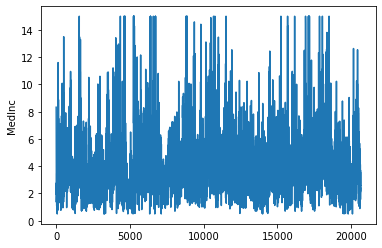

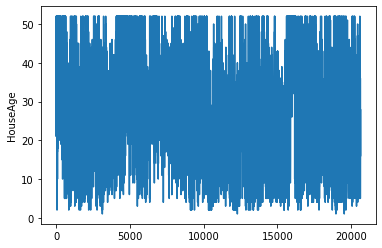

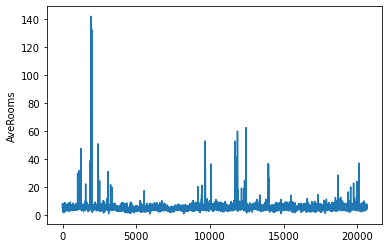

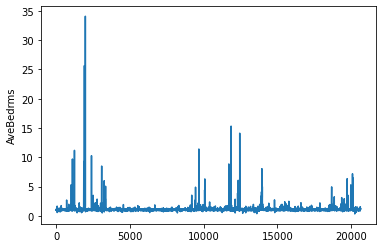

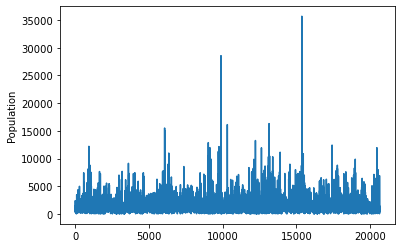

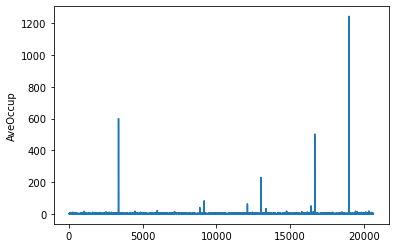

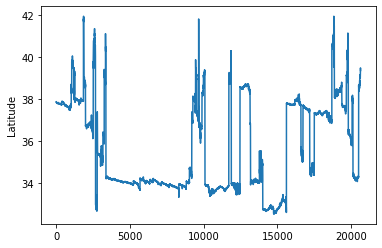

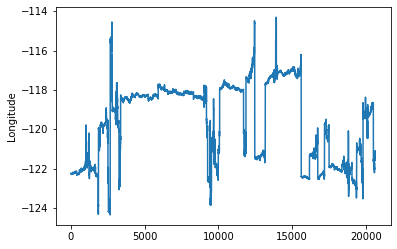

In [22]:
for col,name in zip(range(len(cali['feature_names'])),cali['feature_names']):
    plt.plot(cali['data'][:,col])
    plt.ylabel(name)
    plt.show()
plt.show()

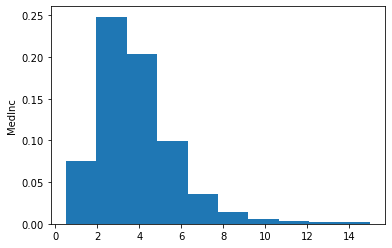

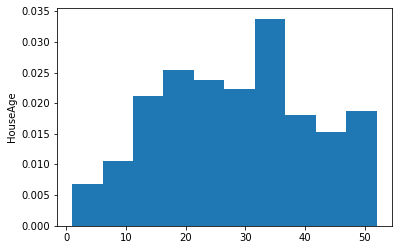

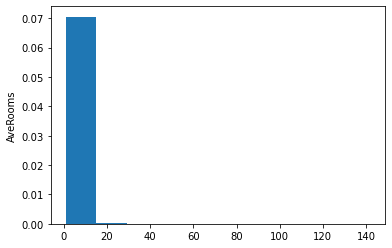

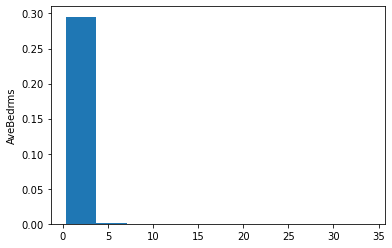

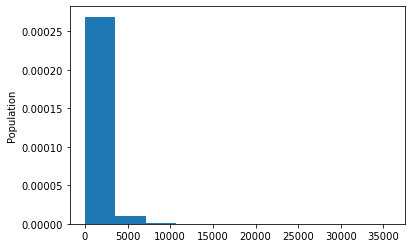

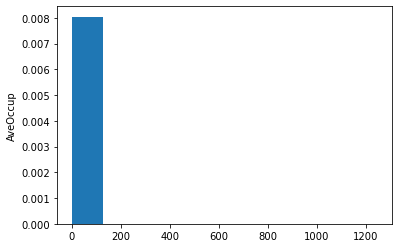

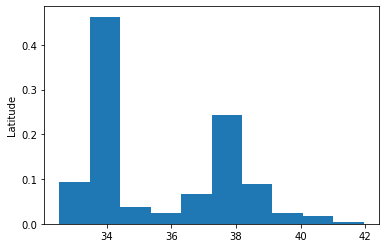

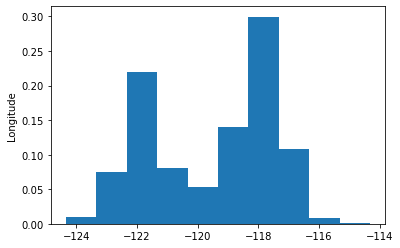

In [23]:
for col,name in zip(range(len(cali['feature_names'])),cali['feature_names']):
    plt.hist(cali['data'][:,col],density=True)
    plt.ylabel(name)
    plt.show()
plt.show()

## Visualisation des données géographiques

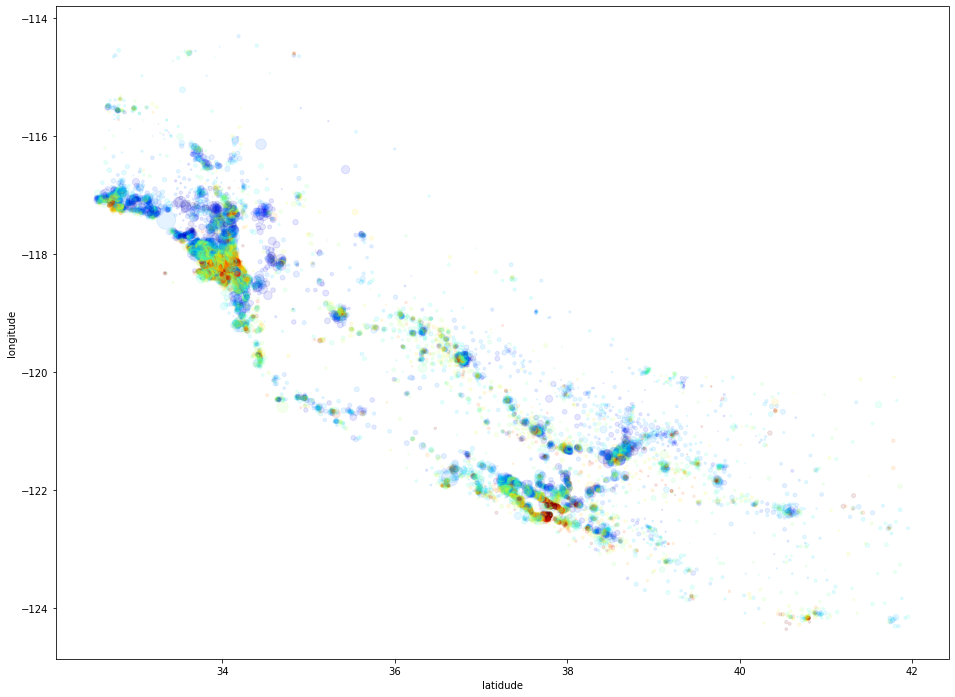

In [24]:
latitude = cali['data'][:,6]
longitude = cali['data'][:,7]
medinc = cali['data'][:,1]
population = cali['data'][:,4]
plt.figure(figsize=(16, 12))
plt.scatter(latitude,longitude,alpha=0.1,c=medinc,s=population/100,cmap=plt.get_cmap("jet"))
plt.xlabel('latidude')
plt.ylabel('longitude')
plt.show()

## Correlation entre les variables

<AxesSubplot:>

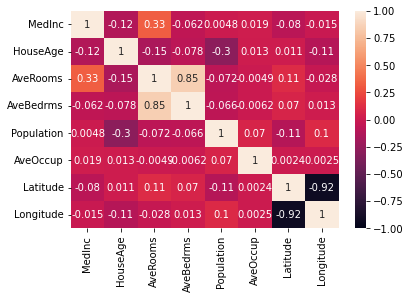

In [25]:
cov_m =np.corrcoef(cali['data'],rowvar=False)
sns.heatmap(cov_m,vmin=-1,vmax=+1,xticklabels=cali['feature_names'],yticklabels=cali['feature_names'],annot=True)

# Split train and test data

In [26]:
X0 = cali['data']
y = cali['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X0, y,test_size=0.3)

In [28]:
len(X_train)*100/len(X0)

70.0

# First model with all features

In [29]:
model_full = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
exp_var_test = explained_variance_score(y_test, y_pred_test)
print(f'MSE: {mse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'Exp.variance: {exp_var_test:.4f}')

MSE: 0.5134
MAE: 0.5272
Exp.variance: 0.6119


# Others models

model_1 => drop average bedroom / house age

In [30]:
X1 = np.delete(X0,1,1)
X1 = np.delete(X1,2,1)

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.3)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_test = model_1.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
exp_var_test = explained_variance_score(y_test, y_pred_test)
print(f'MSE: {mse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'Exp.variance: {exp_var_test:.4f}')


MSE: 0.5492
MAE: 0.5407
Exp.variance: 0.5857


model_2 => drop population ,nb of household mb

In [31]:
X2 = np.delete(X0,4,1)
X2 = np.delete(X2,3,1)

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.3)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred_test = model_2.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
exp_var_test = explained_variance_score(y_test, y_pred_test)
print(f'MSE: {mse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'Exp.variance: {exp_var_test:.4f}')

MSE: 0.5398
MAE: 0.5397
Exp.variance: 0.5962


# Use pandas for easier selection of variables

In [32]:
col = np.concatenate((cali['feature_names'],cali['target_names']))
target = cali['target'].reshape(-1,1)
data = np.concatenate((cali['data'],target),axis=1)

In [33]:
df = pd.DataFrame(data,columns=col)

## Visualisation of data

In [34]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


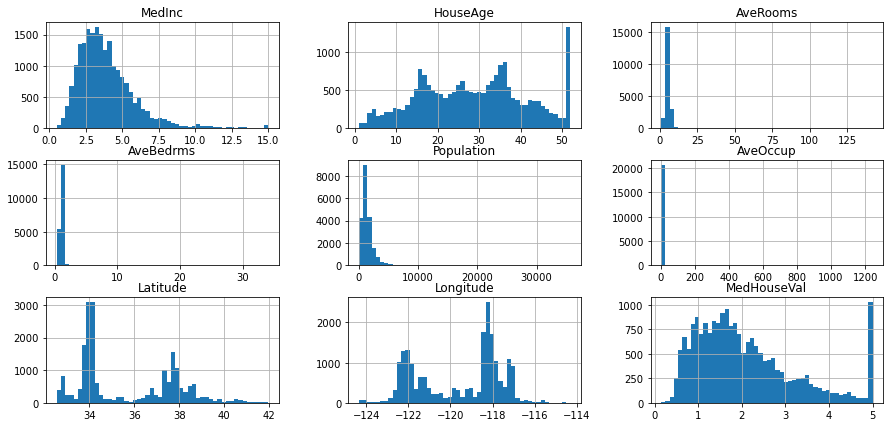

In [68]:
df.hist(bins=50, figsize=(15,7));

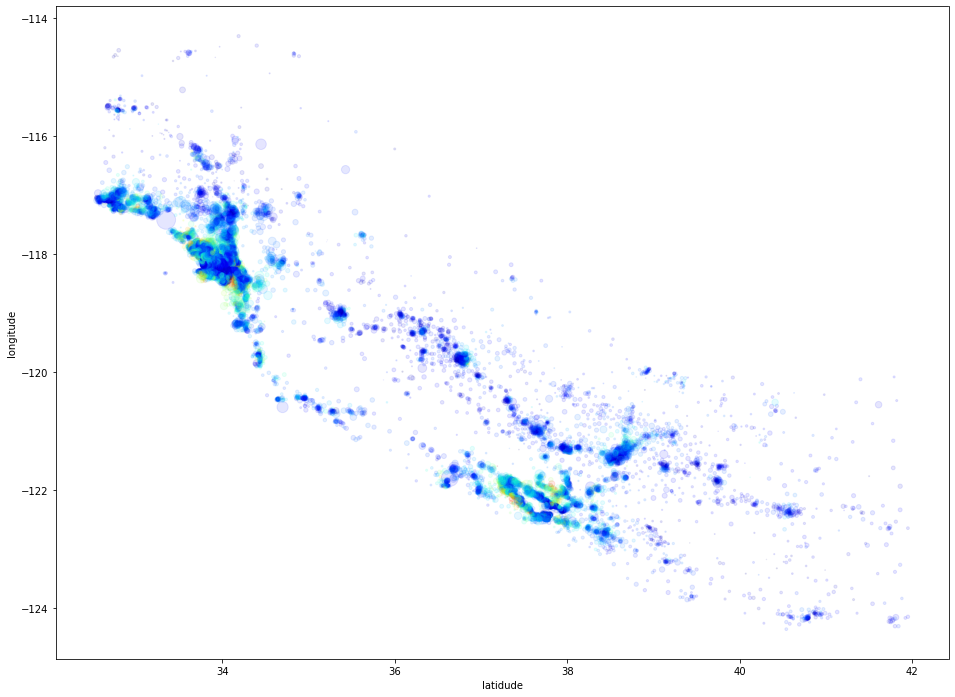

In [35]:
plt.figure(figsize=(16, 12))
plt.scatter(df.Latitude,df.Longitude,alpha=0.1,c=df.MedInc,s=df.Population/100,cmap=plt.get_cmap("jet"))
plt.xlabel('latidude')
plt.ylabel('longitude')
plt.show()

In [70]:
df.corr()['MedHouseVal']

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

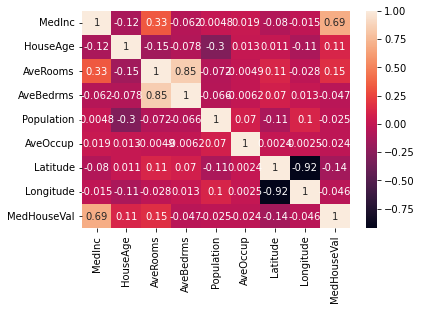

In [72]:
sns.heatmap(df.corr(),annot=True);

## Full model

In [36]:
X0 = df.drop('MedHouseVal',axis=1).values
y = df.MedHouseVal.values
X_train, X_test, y_train, y_test = train_test_split(X0, y,test_size=0.3)

In [37]:
model_full = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
exp_var_test = explained_variance_score(y_test, y_pred_test)
print(f'MSE: {mse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'Exp.variance: {exp_var_test:.4f}')
1 - (1-model.score(X0, y))*(len(y)-1)/(len(y)-X0.shape[1]-1)

MSE: 0.5366
MAE: 0.5318
Exp.variance: 0.5999


0.6054293803653161

## Second/Third model

model_1 => drop average bedroom / house age  
model_2 => drop population ,nb of household mb

In [38]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [39]:
X1 = df.drop(['MedHouseVal','AveBedrms','HouseAge'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.3)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_test = model_1.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
exp_var_test = explained_variance_score(y_test, y_pred_test)
print(f'MSE: {mse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'Exp.variance: {exp_var_test:.4f}')
1 - (1-model_1.score(X1, y))*(len(y)-1)/(len(y)-X1.shape[1]-1)

MSE: 0.5409
MAE: 0.5454
Exp.variance: 0.5800


0.5870728469600475

In [40]:
X2 = df.drop(['MedHouseVal','Population','AveOccup'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X2, y,test_size=0.3)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred_test = model_2.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
exp_var_test = explained_variance_score(y_test, y_pred_test)
print(f'MSE: {mse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'Exp.variance: {exp_var_test:.4f}')
1 - (1-model_2.score(X2, y))*(len(y)-1)/(len(y)-X2.shape[1]-1)
r2 = r2_score(y_test,y_pred_test)


MSE: 0.5451
MAE: 0.5355
Exp.variance: 0.5987


## Feature selection using f_regression

In [41]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [42]:
from sklearn.feature_selection import f_regression,SelectKBest

In [43]:
X0 = df.drop('MedHouseVal',axis=1)
y = df.MedHouseVal
X_train, X_test, y_train, y_test = train_test_split(X0, y,test_size=0.3)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X0, y,test_size=0.3)
selector = SelectKBest(f_regression,k=4).fit(X_train,y_train)
col = selector.get_feature_names_out(X_train.columns)

In [45]:
X_train_best = selector.transform(X_train)

In [46]:
X_test_best = selector.transform(X_test)

In [47]:
model_best = LinearRegression()
model_best.fit(X_train_best, y_train)
y_pred_test = model_best.predict(X_test_best)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
exp_var_test = explained_variance_score(y_test, y_pred_test)
r2 = r2_score(y_test,y_pred_test)

print(f'MSE: {mse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'Exp.variance: {exp_var_test:.4f}')
print(f'r2 {r2}')

MSE: 0.6321
MAE: 0.5949
Exp.variance: 0.5149
r2 0.5146590986743469


In [48]:
coefs_best = model_best.coef_
for coef,name in zip(coefs_best,col):
    print(f'{name} : {coef}')

MedInc : 0.4409720480209388
HouseAge : 0.017296999080608142
AveRooms : -0.017296321469110046
Latitude : -0.043955709707323744


In [49]:
model_best.score(X_test_best,y_test)
1 - (1-model_best.score(X_test_best, y_test))*(len(y_test)-1)/(len(y_test)-X_test_best.shape[1]-1)

0.5143453175841088

Pas vraiment satisfaisant comme analyse :)

# Modele avec mutual_info_regression

In [50]:
from sklearn.feature_selection import mutual_info_regression

In [51]:
X0 = df.drop('MedHouseVal',axis=1)
y = df.MedHouseVal
X_train, X_test, y_train, y_test = train_test_split(X0, y,test_size=0.3)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X0, y,test_size=0.3)
selector = SelectKBest(mutual_info_regression,k=4).fit(X_train,y_train)
col = selector.get_feature_names_out(X_train.columns)

In [53]:
X_train_best = selector.transform(X_train)

In [54]:
X_test_best = selector.transform(X_test)

In [55]:
model_best_mi = LinearRegression()
model_best_mi.fit(X_train_best, y_train)
y_pred_test = model_best_mi.predict(X_test_best)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
exp_var_test = explained_variance_score(y_test, y_pred_test)
r2 = r2_score(y_test,y_pred_test)

print(f'MSE: {mse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'Exp.variance: {exp_var_test:.4f}')
print(f'r2 {r2}')

MSE: 0.5533
MAE: 0.5479
Exp.variance: 0.5916
r2 0.5915609427114419


In [56]:
coefs_best = model_best_mi.coef_
for coef,name in zip(coefs_best,col):
    print(f'{name} : {coef}')

MedInc : 0.3589940366684468
AveRooms : 0.012087784021858396
Latitude : -0.504689541498166
Longitude : -0.5175182453199546


# Comparaison des modèles

Pour pouvoir comparer les modèles, il faut partir du même jeux de données avec le même train/test set

In [57]:
X0 = df.drop('MedHouseVal',axis=1)
y = df.MedHouseVal
X_train, X_test, y_train, y_test = train_test_split(X0, y,test_size=0.3)

In [58]:
def ajustR(R,nbpredictor,nb_obs):
    r2 = 1-(1-R)*(nb_obs-1)/(nb_obs-nbpredictor-1)
    return r2

In [59]:
def modelise(X_train,X_test,y_train,y_test,label):
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    r2 = r2_score(y_test,y_pred_test)
    r2_adj = ajustR(r2,len(model.coef_),len(y_test))
    mse_test = mean_squared_error(y_test, y_pred_test)
    root_mse = np.sqrt(mse_test)
    print(f'{label[0:10]} | R²: {r2} | R² adjusted : {r2_adj} | MSE : {mse_test} | RMSE : {root_mse}')
    return model

In [60]:
#full model
modelise(X_train,X_test,y_train,y_test,'full_model')

# f regression selector
selector = SelectKBest(f_regression,k=4).fit(X_train,y_train)
X_train_best = selector.transform(X_train)
X_test_best = selector.transform(X_test)
col = selector.get_feature_names_out(X_train.columns)
modelise(X_train_best,X_test_best,y_train,y_test,'f selector')

# mutual_info_regression
selector = SelectKBest(mutual_info_regression,k=4).fit(X_train,y_train)
X_train_best = selector.transform(X_train)
X_test_best = selector.transform(X_test)
col = selector.get_feature_names_out(X_train.columns)
modelise(X_train_best,X_test_best,y_train,y_test,'mutual_info_regression')

full_model | R²: 0.6057407957560044 | R² adjusted : 0.6052306754852698 | MSE : 0.5167474370200319 | RMSE : 0.7188514707643241
f selector | R²: 0.5147952788926222 | R² adjusted : 0.5144815858451954 | MSE : 0.6359478570526622 | RMSE : 0.7974633891613221
mutual_inf | R²: 0.5833839807915671 | R² adjusted : 0.5831146314983985 | MSE : 0.5460500549638717 | RMSE : 0.7389519977399559


LinearRegression()

**Task 2: Explain this to your neighbour...**
* The training and test errors are quite close. What does this mean? 

<details><summary>HINT</summary><br>
HINT: think in terms of if we were to apply this fitted model to new data the model has not seen.

</details>

* If your MSE & RMSE results are different to those of your peers (even when using the same features and model), why might this be? 

**Task 3:**
* Can you figure out how to load the 'boston house price' or the 'Linnerrud' data set that comes with sklearn? Try to build a model using one of these data sets.

# Linnerud DataSet

In [61]:
from sklearn.datasets import load_linnerud

In [62]:
df_lin = load_linnerud()

In [63]:
lin_dic.keys()

NameError: name 'lin_dic' is not defined

In [ ]:
col = np.concatenate((lin_dic['feature_names'],lin_dic['target_names']))
data = np.concatenate((lin_dic['data'],lin_dic['target']),axis=1)

In [ ]:
df_lin = pd.DataFrame(data,columns=col)

In [ ]:
df_lin.describe()

In [ ]:
liste_y = df_lin.columns[3:]
liste_x = df_lin.columns[:3]
sns.pairplot(df_lin,height=1.5);

In [ ]:
X=df_lin[['Chins','Situps','Jumps']]
Y=df_lin[['Weight','Waist','Pulse']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)

In [ ]:
model = modelise(X_train,X_test,y_train,y_test,'full_model')

In [ ]:
for coefs,y in zip(model.coef_,df_lin.columns[3:]):
    print(f'Y : {y}')
    for coef,name in zip(coefs,model.feature_names_in_):
        print(f'Feature : {name} = {coef}')

# Ames House price openML

In [ ]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices",as_frame=True)

In [ ]:
housing